<a href="https://colab.research.google.com/github/dpenamoya-ops/TelecomX_LATAM_parte2/blob/main/TelecomX_LATAM_parte2_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://trello.com/b/O1cSUxni/telecom-x-analisis-de-evasion-de-clientes-parte-2-dpena

#🛠️ Preparación de los Datos

##Extracción del Archivo Tratado

In [1]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/dpenamoya-ops/TelecomX_LATAM_parte2/main/datos_tratados.csv")

# Mostrar las primeras filas para verificar la carga
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


(   customerID Churn                                           customer  \
 0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
 1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
 2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
 3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
 4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
 
                                              phone  \
 0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
 1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
 2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
 3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
 4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
 
                                             internet  \
 0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
 1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
 2  {'InternetService': 'Fiber optic', 'Onlin

##Eliminación de Columnas Irrelevantes

In [2]:
#Revisar las columnas:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [3]:
#identificar posibles columnas ID
df.nunique().sort_values(ascending=False).head(10)

,0
customerID,7267
account,6931
customer,891
internet,129
phone,3
Churn,2


In [4]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['customerID'])

# Verificar resultado
df.head()

,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


evaluamos columnas account, account, internet

In [5]:
df['account'].head()

,account
0,"{'Contract': 'One year', 'PaperlessBilling': '..."
1,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,"{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df['customer'].value_counts().head()

,count
customer,
"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}",223
"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}",192
"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}",77
"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}",76
"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}",74


In [7]:
df['internet'].value_counts().head()

,count
internet,
"{'InternetService': 'No', 'OnlineSecurity': 'No internet service', 'OnlineBackup': 'No internet service', 'DeviceProtection': 'No internet service', 'TechSupport': 'No internet service', 'StreamingTV': 'No internet service', 'StreamingMovies': 'No internet service'}",1581
"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}",417
"{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}",304
"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}",186
"{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}",172


In [8]:
#confirmamos si son strings
type(df['account'][0])

str

In [9]:
#convertimos a diccionario real
import ast

df['account'] = df['account'].apply(ast.literal_eval)
df['customer'] = df['customer'].apply(ast.literal_eval)
df['internet'] = df['internet'].apply(ast.literal_eval)
df['phone'] = df['phone'].apply(ast.literal_eval)

In [10]:
#Expandirmos a columnas normales
df_account = df['account'].apply(pd.Series)
df_customer = df['customer'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)

In [11]:
#Unimos todo al dataframe original
df = pd.concat(
    [df.drop(columns=['account','customer','internet','phone']),
     df_account,
     df_customer,
     df_internet,
     df_phone],
    axis=1
)

In [12]:
df.head()

,Churn,Contract,PaperlessBilling,PaymentMethod,Charges,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines
0,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",Female,0,Yes,Yes,9,DSL,No,Yes,No,Yes,Yes,No,Yes,No
1,No,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",Male,0,No,No,9,DSL,No,No,No,No,No,Yes,Yes,Yes
2,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",Male,0,No,No,4,Fiber optic,No,No,Yes,No,No,No,Yes,No
3,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",Male,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No
4,Yes,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",Female,1,Yes,No,3,Fiber optic,No,No,No,Yes,Yes,No,Yes,No


In [13]:
type(df['Charges'][0])

dict

In [14]:
charges_df = df['Charges'].apply(pd.Series)

In [15]:
charges_df.head()

,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


In [16]:
#convertimos a numérico
charges_df['Monthly'] = pd.to_numeric(charges_df['Monthly'], errors='coerce')
charges_df['Total'] = pd.to_numeric(charges_df['Total'], errors='coerce')

In [17]:
#renombramos columnas (más profesional)
charges_df = charges_df.rename(columns={
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges'
})

In [18]:
#integramos al df principal
df = pd.concat(
    [df.drop(columns=['Charges']), charges_df],
    axis=1
)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   Contract          7267 non-null   object 
 2   PaperlessBilling  7267 non-null   object 
 3   PaymentMethod     7267 non-null   object 
 4   gender            7267 non-null   object 
 5   SeniorCitizen     7267 non-null   int64  
 6   Partner           7267 non-null   object 
 7   Dependents        7267 non-null   object 
 8   tenure            7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  PhoneService      7267 non-null   object 


In [20]:
#revisamos si se generaron NaN
df[['MonthlyCharges','TotalCharges']].isnull().sum()

,0
MonthlyCharges,0
TotalCharges,11


In [21]:
#confirmamos ternure
df[df['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
975,0,56.05,NaN
1775,0,20.00,NaN
1955,0,61.90,NaN
2075,0,19.70,NaN
2232,0,20.25,NaN
2308,0,25.35,NaN
2930,0,73.35,NaN
3134,0,25.75,NaN
3203,0,52.55,NaN
4169,0,80.85,NaN


In [22]:
#reemplazamos los Nan por 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [23]:
#verificamos
df.isnull().sum()

,0
Churn,224
Contract,0
PaperlessBilling,0
PaymentMethod,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0


Observamos que la columna Churn aun tiene 224 valores NaN

In [24]:
df[df['Churn'].isnull()].head()

,Churn,Contract,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,MonthlyCharges,TotalCharges
30,NaN,Month-to-month,Yes,Bank transfer (automatic),Female,0,No,No,11,Fiber optic,Yes,No,No,No,No,No,Yes,Yes,79.00,929.30
75,NaN,Two year,Yes,Credit card (automatic),Male,0,No,No,71,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No,19.90,1355.10
96,NaN,One year,Yes,Electronic check,Male,0,No,No,29,DSL,Yes,Yes,No,Yes,No,No,Yes,No,58.75,1696.20
98,NaN,Month-to-month,No,Credit card (automatic),Female,1,No,No,5,DSL,Yes,Yes,No,Yes,No,No,Yes,No,59.90,287.85
175,NaN,One year,Yes,Bank transfer (automatic),Male,1,Yes,No,65,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,103.15,6792.45


In [25]:
#eliminanos valores NaN
df = df.dropna(subset=['Churn'])

In [26]:
#verificamos que no quede ninguno
df['Churn'].isnull().sum()

np.int64(0)

Verificamos el  balance de clases

In [27]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


##Verificación de la Proporción de Cancelación (Churn)

In [28]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Interpretación del desbalance

Tenemos:

🔵 73.5% clientes que NO cancelan

🔴 26.5% clientes que SÍ cancelan

**¿Hay desbalance?**

Sí, pero no es extremo.

En machine learning:

50/50 → balance perfecto

70/30 → desbalance moderado ✅

90/10 → desbalance serio ⚠️

Este caso es un desbalance moderado.

**¿Por qué importa esto?**

Si entrenamos un modelo sin considerar esto, podría:

Aprender a predecir siempre "No"

Obtener 73% de accuracy

Pero ser inútil detectando churn real

Por eso más adelante deberemos:

Evaluar precision, recall y F1

No confiar solo en accuracy

Considerar class_weight='balanced' si usamos modelos como LogisticRegression

**Conclusión:** La proporción de cancelación es aproximadamente 26.5%, mientras que el 73.5% de los clientes permanecen activos. Existe un desbalance moderado entre las clases, lo cual podría afectar el rendimiento de modelos predictivos si no se consideran métricas adecuadas o técnicas de ajuste.

##Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [29]:
#Convertimos la variable objetivo
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [30]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [31]:
#Separamos X e y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [32]:
#identificamos variables categoricas
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PhoneService', 'MultipleLines'],
      dtype='object')

In [33]:
#aplicamos one hot encoding
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

In [34]:
#verificamos
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,9,65.6,593.30,True,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
1,0,9,59.9,542.40,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,True
2,0,4,73.9,280.85,False,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,1,13,98.0,1237.85,False,False,True,False,True,False,...,True,False,False,False,True,False,True,True,False,False
4,1,3,83.9,267.40,False,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False


In [35]:
X_encoded.dtypes.value_counts()

,count
bool,26
int64,2
float64,2


In [36]:
#transformamos los datos bool a binario
X_encoded = X_encoded.astype(int)

In [37]:
X_encoded.dtypes.value_counts()

,count
int64,30


Hacemos el split/test obligatorio

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [39]:
y_train.value_counts(normalize=True)

,proportion
Churn,
0,0.734647
1,0.265353


##Balanceo de Clases
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

Probamos los tres métodos: Undersampling, Oversampling y SMOTE

In [40]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [41]:
y_train_under.value_counts()


,count
Churn,
0,1495
1,1495


In [42]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [43]:
y_train_over.value_counts()


,count
Churn,
0,4139
1,4139


In [44]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
y_train_smote.value_counts()

,count
Churn,
0,4139
1,4139


##Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [46]:
#Paso 1 — Importar StandardScaler
from sklearn.preprocessing import StandardScaler

In [47]:
#Paso 2 — Crear el escalador
scaler = StandardScaler()

In [48]:
#Paso 3 — Ajustar y transformar SOLO el entrenamiento balanceado
X_train_scaled = scaler.fit_transform(X_train_smote)

In [49]:
#Paso 4 — Transformar el test (sin hacer fit)
X_test_scaled = scaler.transform(X_test)

¿Por qué no hacemos fit en el test?

Porque eso sería data leakage.

El modelo debe "aprender" la media y desviación solo del entrenamiento

#🎯 Correlación y Selección de Variables

##Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [50]:
#Paso 1 — Crear DataFrame completo (incluyendo target)
df_corr = X_encoded.copy()
df_corr['Churn'] = y

In [51]:
#Paso 2 — Calcular matriz de correlación
corr_matrix = df_corr.corr()

In [52]:
#Paso 3 — Ver correlación con la variable objetivo
corr_with_target = corr_matrix['Churn'].sort_values(ascending=False)
corr_with_target

,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193422
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService_Yes,0.011942


Variables con correlación positiva alta → aumentan probabilidad de churn

Variables con correlación negativa fuerte → reducen churn

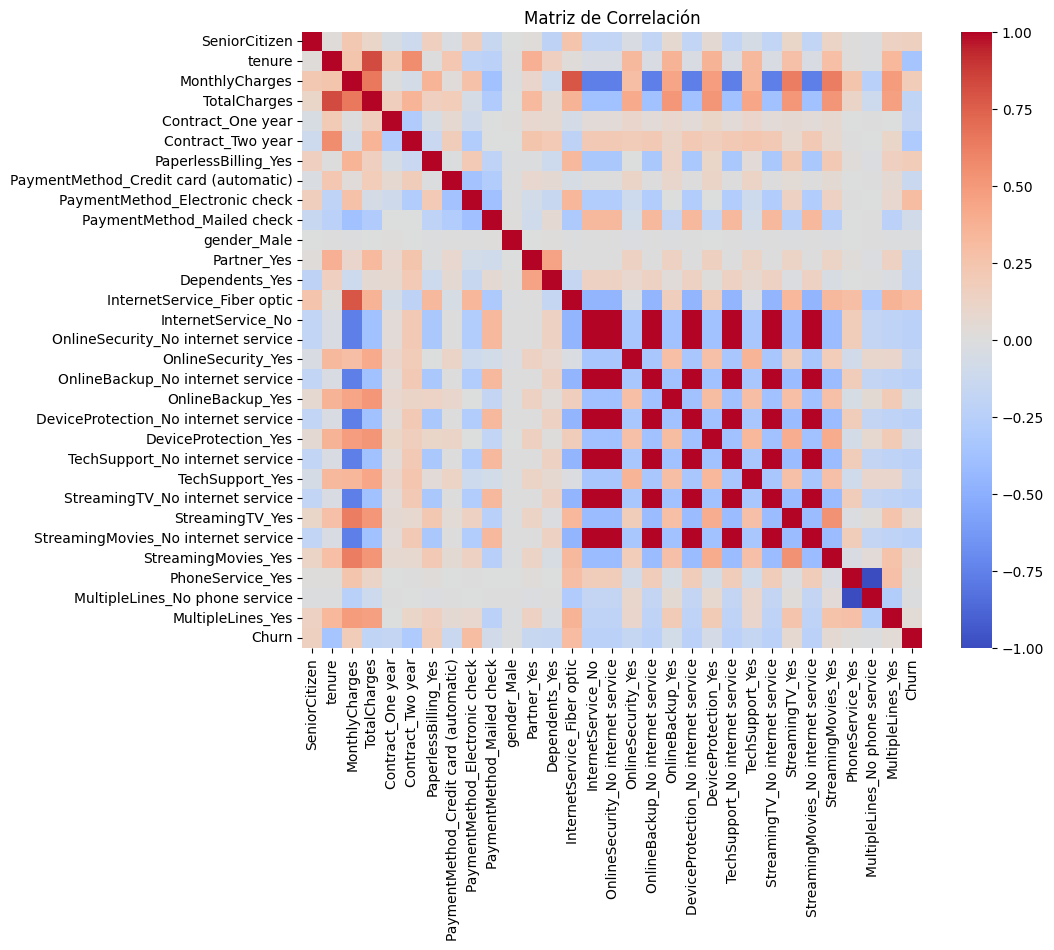

In [53]:
#Paso 4 — Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

In [54]:
corr_with_target

,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193422
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService_Yes,0.011942


Variables MÁS asociadas al Churn (correlación positiva)

Las que aumentan probabilidad de cancelación:
| Variable                           | Correlación |
| ---------------------------------- | ----------- |
| **InternetService_Fiber optic**    | **0.308**   |
| **PaymentMethod_Electronic check** | **0.302**   |
| MonthlyCharges                     | 0.193       |
| PaperlessBilling_Yes               | 0.192       |
| SeniorCitizen                      | 0.151       |


🧠 Interpretación

🔴 Fiber optic (0.308)

Clientes con fibra tienen mayor churn.
Posible explicación:
Servicio más caro,
Expectativas más altas,
Más competencia.

🔴 Electronic check (0.302)
Muy interesante.
Este método de pago suele asociarse con:
Clientes más inestables,
Mayor riesgo financiero,
Mayor churn histórico en este dataset.

🔴 MonthlyCharges (0.193)
A mayor costo mensual → mayor churn.
Esto es lógico desde negocio.

Variables MÁS protectoras (correlación negativa fuerte)

Las que reducen probabilidad de cancelación:

| Variable           | Correlación |
| ------------------ | ----------- |
| **tenure**         | **-0.352**  |
| Contract_Two year  | -0.302      |
| InternetService_No | -0.228      |
| TotalCharges       | -0.198      |
| Contract_One year  | -0.178      |
| OnlineSecurity_Yes | -0.171      |
| TechSupport_Yes    | -0.165      |
| Dependents_Yes     | -0.164      |


🧠 Interpretación clave

🟢 tenure (-0.352) → la más importante

Cuanto más tiempo lleva el cliente,
menos probabilidad de cancelar.

Esto es completamente lógico y muy fuerte.

🟢 Contract_Two year (-0.302)

Contratos largos reducen churn.

Tiene sentido de negocio.

🟢 Servicios adicionales (Security, TechSupport)

Clientes con más servicios:

Más comprometidos

Mayor switching cost

Menor churn

¿Hay correlaciones extremadamente altas entre variables?

Debemos revisar especialmente:

tenure vs TotalCharges

In [55]:
corr_matrix['tenure']['TotalCharges']

np.float64(0.8261788364342151)

Conclusión profesional de esta etapa

Variables más influyentes:

🔝 tenure

🔝 Contract type

🔝 Internet service type

🔝 Payment method

🔝 MonthlyCharges

Esto confirma coherencia de negocio.

##Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

Ahora queremos responder preguntas específicas de negocio:

1️⃣ ¿Cómo se relaciona el tiempo de contrato con el churn?

2️⃣ ¿Cómo se relaciona el gasto total con el churn?

**Tiempo de contrato × Cancelación**

Aquí podemos analizar dos cosas:

Tipo de contrato (Month-to-month, One year, Two year)

tenure (cantidad de meses)

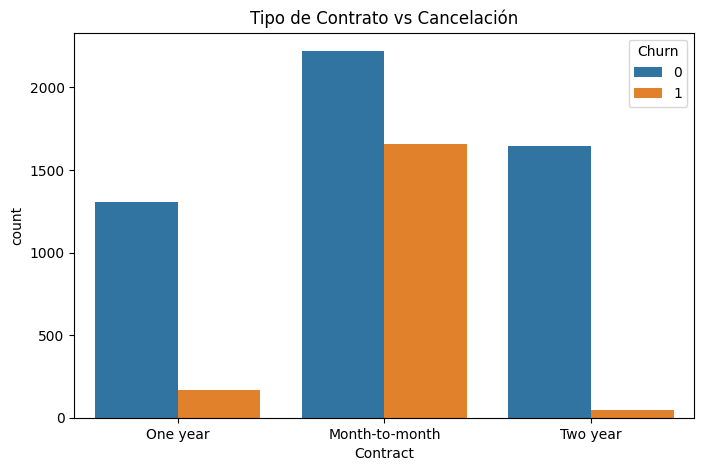

In [56]:
#Tipo de contrato vs Churn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Tipo de Contrato vs Cancelación')
plt.show()

¿Los contratos mensuales dominan el churn?

Sí, de forma muy marcada.

En el gráfico Tipo de Contrato vs Cancelación:

El contrato Month-to-month concentra la enorme mayoría de los churn.

Contratos One year y Two year tienen muy baja tasa de cancelación relativa.

📊 Interpretación:

Los contratos mensuales tienen mayor flexibilidad → mayor probabilidad de salida.

Los contratos largos actúan como mecanismo de retención.

El tipo de contrato es una variable categórica altamente predictiva.

Probablemente será una de las variables con mayor importancia en modelos como:

Random Forest

XGBoost

Regresión Logística

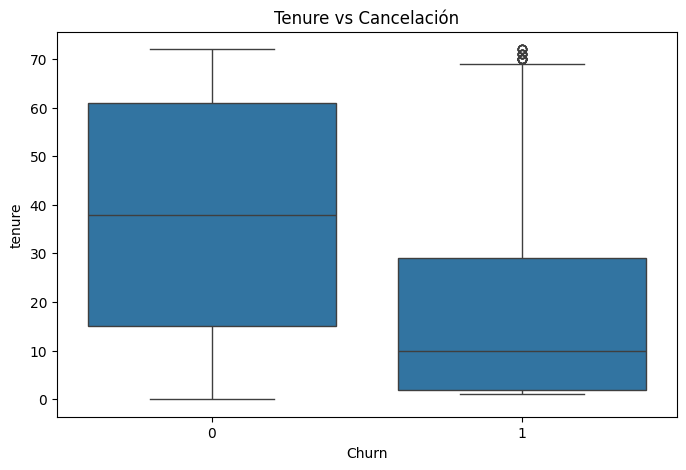

In [57]:
#Tenure vs Churn (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Cancelación')
plt.show()

¿El churn se concentra en tenure bajo?

Sí, claramente.

En el boxplot de Tenure vs Churn se observa que:

Clientes que NO cancelan (0) → mediana de tenure mucho más alta (~35–40 meses).

Clientes que SÍ cancelan (1) → mediana mucho más baja (~8–10 meses).

La mayoría de churn ocurre en los primeros meses.

📊 Interpretación:

Existe una relación negativa fuerte entre tenure y churn.

Clientes nuevos son mucho más propensos a cancelar.

Tenure es una variable extremadamente importante para el modelo.

Esto confirma un patrón clásico de churn:

El riesgo es mayor en las primeras etapas del ciclo de vida del cliente.

Gasto Total × Cancelación

Ahora analizamos TotalCharges.

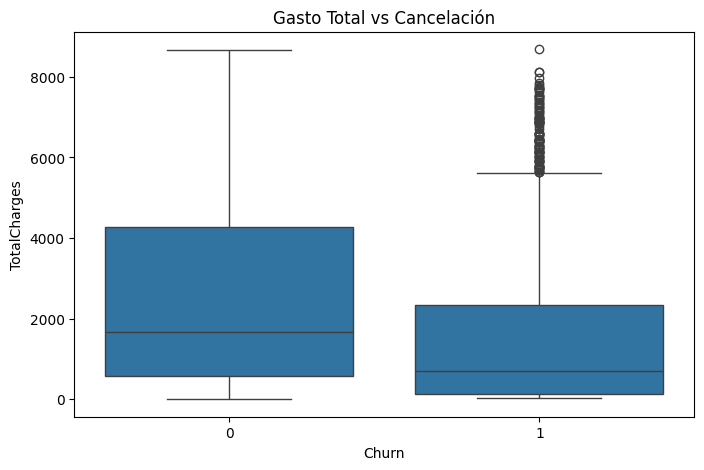

In [58]:
#Boxplot TotalCharges
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Gasto Total vs Cancelación')
plt.show()

¿Hay outliers interesantes?

Sí, hay varios puntos relevantes:

🔹 En TotalCharges vs Churn (boxplot)

Algunos clientes con churn tienen TotalCharges muy altos.

Esto sugiere que no todos los churners son clientes nuevos.

Hay clientes de alto valor que también cancelan.

👉 Esto es interesante desde negocio:

Puede indicar insatisfacción acumulada.

Puede relacionarse con aumentos de precio o cambios contractuales.

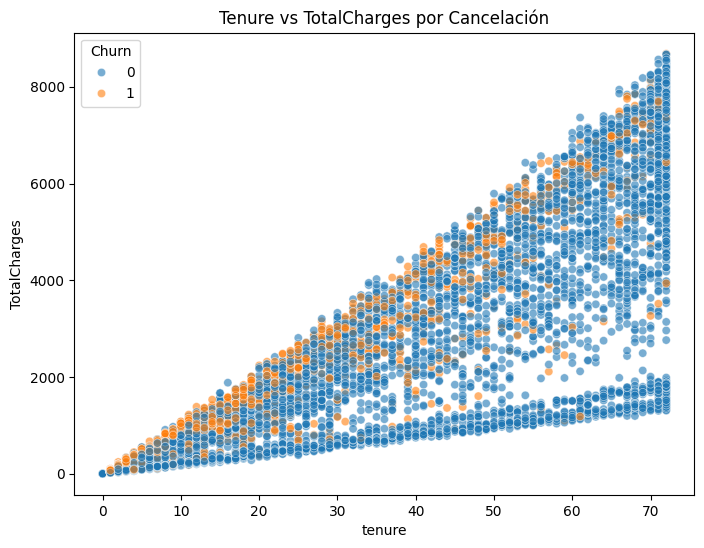

In [59]:
#Scatter plot tenure vs TotalCharges (coloreado por churn)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    data=df,
    alpha=0.6
)
plt.title('Tenure vs TotalCharges por Cancelación')
plt.show()

En el scatter Tenure vs TotalCharges

Se observa:

Correlación fuerte entre tenure y TotalCharges (ya confirmaste ~0.83).

Algunos churners aparecen con tenure medio-alto.

No todos los churners están en la zona de bajo gasto.

👉 Esto indica que:

Aunque tenure bajo domina, no es el único patrón.

Hay churn en clientes intermedios.

**Conclusiones del Análisis Dirigido**

✔ El churn se concentra principalmente en clientes con bajo tenure.

✔ Los contratos mensuales dominan el churn de forma clara.

✔ Existen outliers interesantes: clientes de alto valor que también cancelan.

✔ Tenure y tipo de contrato son variables críticas.

✔ TotalCharges está fuertemente correlacionado con tenure (posible redundancia parcial).

**Implicación para el modelo**

Ya podemos anticipar:

Tenure será una variable de alto peso.

Contract_Month-to-month será muy importante.

Puede existir multicolinealidad entre Tenure y TotalCharges (algo a revisar si usas modelos lineales).

#🤖 Modelado Predictivo

##Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

🎯 Separación de Datos (Train/Test Split)

Ahora vamos a dividir el dataset para poder:

🧠 Entrenar el modelo con datos que “conoce”

🧪 Evaluarlo con datos que nunca ha visto (simulación real)

🎯 Separación de Datos (Train/Test Split)

Ahora vamos a dividir el dataset para poder:

🧠 Entrenar el modelo con datos que “conoce”

🧪 Evaluarlo con datos que nunca ha visto (simulación real)

In [60]:
#Paso 1 — Separar variables
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [61]:
#Paso 2 — División 80/20 (recomendado)
#Usaremos 80% entrenamiento y 20% prueba.
#Además usamos stratify=y para mantener la proporción de churn.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [62]:
#Verificamos distribución

print("Distribución original:")
print(y.value_counts(normalize=True))

print("\nDistribución en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True))

Distribución original:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Distribución en entrenamiento:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución en prueba:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [63]:
#Paso 3 — Aplicar SMOTE SOLO en entrenamiento
from imblearn.over_sampling import SMOTE
import pandas as pd

# Identify categorical columns (assuming 'categorical_cols' is defined from previous steps)
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to X_train and X_test
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure columns are aligned after encoding, important if test set has different categories
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Convert boolean columns to integers
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

print("Antes de SMOTE:")
print(y_train.value_counts())

print("\nDespués de SMOTE:")
print(y_train_resampled.value_counts())

# Update X_train and X_test to their encoded versions for future steps
X_train = X_train_encoded
X_test = X_test_encoded

ValueError: could not convert string to float: 'Month-to-month'

¿Qué está pasando?

SMOTE funciona con distancias (KNN interno).

Eso significa que:

👉 Solo puede trabajar con variables numéricas
👉 No puede procesar texto o variables categóricas tipo string

Solución

Antes de aplicar SMOTE debes:

✅ Codificar variables categóricas

1 — One Hot Encoding

In [64]:
X = pd.get_dummies(X, drop_first=True)

In [65]:
#Luego volvemos a hacer el split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [66]:
#repetimos SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
#verificamos strings
print(X_train.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year                           bool
Contract_Two year                           bool
PaperlessBilling_Yes                        bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes

El problema es que SMOTE no acepta columnas booleanas (bool), aunque sean numéricas internamente.

Solución rápida

Conviertir los bool a int.

In [68]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [69]:
#aplicamos SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:")
print(y_train.value_counts())

print("\nDespués de SMOTE:")
print(y_train_resampled.value_counts())

Antes de SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64

Después de SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64
